# Ames Housing Data
   ## 1st and Second Models


## Problem Statement

As a data scientist working for an up and coming real estate app, how can we optimize predicting pricing outcomes for homeowners looking to sell?  Whether it’s the homeowner pricing too high, leading their homes unsellable even in good markets or homeowners not maximizing the profits by listing the prices too low.  We can optimize the predictions through feature engineering and linear regression so that we can have an R2 score that exceeds a baseline model. We can also gain insights how these features contribute to pricing as well. 


## Background/Outside Research

Whether you are in a good market or not, overconfidence can be an issue when selling your home. You have to put your home in a good position to sell well and that ultimately comes down to price.  While we know about the fundamentals about supply and demand and how that can tie-in to a seller's market, you do not want to overprice your home.  Per Trulia.com's article "8 reasons Your House Isn't Selling", Determining the best asking price is one of the most important aspects of selling a home. The bottom line is that if you list the price of the home way above market value, you will miss out on prospective buyers(trulia.com).  The other side of this coin is if a home owner is not utilizing their resources and ends up underpricing their homes, then you have someone that has not maximized the return on their investment. While their can be a myriad of painpoints for home selling, we can help address one of the main painpoints by helping create a linear model that can predict prices accurately. That can help owners and any other stakeholders that are part of this process such as real estate agents, and the company they represent.

As part of the methodology I also wanted to look at some of the features that are part of the home that buyers will pay extra for as a way to drive the feature engineering in the creation of this model. Features such as number of fireplaces, 40% of home buyers are willing to cough up an extra 1400 dollars for one(Weigley, S.,2013). This ties in to the feature in the data set 'FirePlaces' which indicates number of fireplaces in the home.  Another example of this is central air conditioning, "with nearly seven in 10 homeowners willing to pay extra"(Weigley, S., 2013). Of course what people are willing to pay for is different than what these features could actually contribute to the overall cost of a home.

<ul>
<li> Weigley, S.(2019). 11 home features buyers will pay extra for. Retrieved from [USA Today](https://www.usatoday.com/story/money/personalfinance/2013/04/28/24-7-home-features/2106203/). </li>
<li> Web Editor.(nd). 8 Reasons Your House Isn't Selling. Retrieved from [Trulia Blog](https://www.trulia.com/blog/how-to-sell-a-house-8-reasons/). </li>
</ul>

## Finding the right model

Part of finding the right model will involve a few factors, what is the R2 Score?  The R2 indicates how much of the variability in our target is explained by the features in our model. This can help us assess which regression model gives us the best predictions.

Interpreting coefficients can be explained as, for every 1 unit increase of a particular feature, we expect the target to increase by the coefficient amount. For those models that are not scaled, this can be a good way to see how the features contribute from a dollar amount to get insight into what contributes heavily to the sales price of these homes.

Another important aspect to consider is how a model performs in terms of bias-variance.  Typically when a model is high bias, this model is considered underfit. This indicates a model that is bad at predicting a target. Whether its data that it has trained on it or unseen data.  In this case we need to increase variance, and we can do that with complexity of the model, that is adding more features.
On the other hand a high variance model indicates a complicated model that does not do well generalizing to new data.  This can indicate that the model needs to be simplified. An overfit model does well on the data its trained on, but not on the unseen data. We can tackle this issue through regularization(ridge or lasso), or simplifying the model with less features.

Reference
Lesson 3.02 - Regression Metrics


## Import libraries and data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.impute import IterativeImputer

In [2]:
train_df=pd.read_csv('../datasets/train.csv')

## Data clean up!

In [3]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 80)
#https://stackoverflow.com/questions/23168416/pandas-printing-all-dtypes

In [4]:
#look at headers
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
#look at dataframe dimensions
train_df.shape

(2051, 81)

In [7]:
#Checking for nulls
train_df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train_df.isnull().mean().sort_values(ascending=False)

Pool QC         0.995612
Misc Feature    0.968308
Alley           0.931741
Fence           0.804973
Fireplace Qu    0.487567
                  ...   
Heating QC      0.000000
Central Air     0.000000
Electrical      0.000000
1st Flr SF      0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [9]:
#dropping columns with nulls close to and over 50% as well as some lower correlation columns as well.
train_df.drop(columns=['Pool QC', 'Misc Feature', 'Alley','Fence','Lot Frontage','Mas Vnr Area','Garage Yr Blt', 'Fireplace Qu'], inplace=True)
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [10]:
train_df.shape

(2051, 73)

In [11]:
train_df.isnull().mean().sort_values(ascending=False)

Garage Qual        0.055583
Garage Finish      0.055583
Garage Cond        0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
Bsmt Qual          0.026816
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Mas Vnr Type       0.010726
Bsmt Full Bath     0.000975
Bsmt Half Bath     0.000975
Garage Cars        0.000488
Garage Area        0.000488
Total Bsmt SF      0.000488
BsmtFin SF 1       0.000488
BsmtFin SF 2       0.000488
Bsmt Unf SF        0.000488
Gr Liv Area        0.000000
Low Qual Fin SF    0.000000
Full Bath          0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
Functional         0.000000
Kitchen AbvGr      0.000000
3Ssn Porch         0.000000
Sale Type          0.000000
Yr Sold            0.000000
Mo Sold            0.000000
Misc Val           0.000000
Pool Area          0.000000
Screen Porch       0.000000
Enclosed Porch     0.000000
Kitchen Qual       0.000000
Open Porch SF      0.000000
Wood Deck SF       0

In [12]:
train_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Area             int64
Street              object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
H

In [13]:
#renamed the columns with a more appropriate format
train_df.rename(columns = lambda x: x.replace(' ', '_').lower(), inplace = True)

train_df.head(1)
#week 2 breakfast hour:pandas Review

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500


In [14]:
#dropping rows with nulls
train_df.dropna(inplace=True)
train_df.shape

(1866, 73)

In [15]:
train_df[['year_built','year_remod/add','yr_sold']]=train_df[['year_built','year_remod/add','yr_sold']].apply(pd.to_datetime,format='%Y')

#https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime

In [16]:
train_df.rename(columns={'year_remod/add':'year_remod_add'}, inplace=True)

In [17]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010-01-01,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009-01-01,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010-01-01,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010-01-01,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010-01-01,WD,138500


In [18]:
sns.set_style('whitegrid')

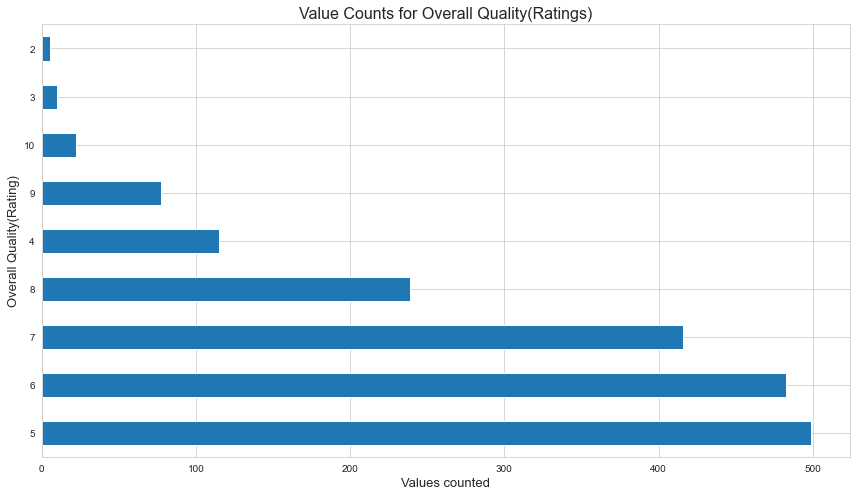

In [19]:
plt.figure(figsize = (12,7))
plt.title('Value Counts for Overall Quality(Ratings)', fontdict={'fontsize':16})
plt.ylabel('Overall Quality(Rating)',fontdict={'fontsize':13})
plt.xlabel('Values counted',fontdict={'fontsize':13})
train_df['overall_qual'].value_counts().plot(kind='barh');
plt.tight_layout()
plt.savefig('../images/overall_quality_value_cts.png')

We can see most of the houses are between a quality rating of 5 and 8.

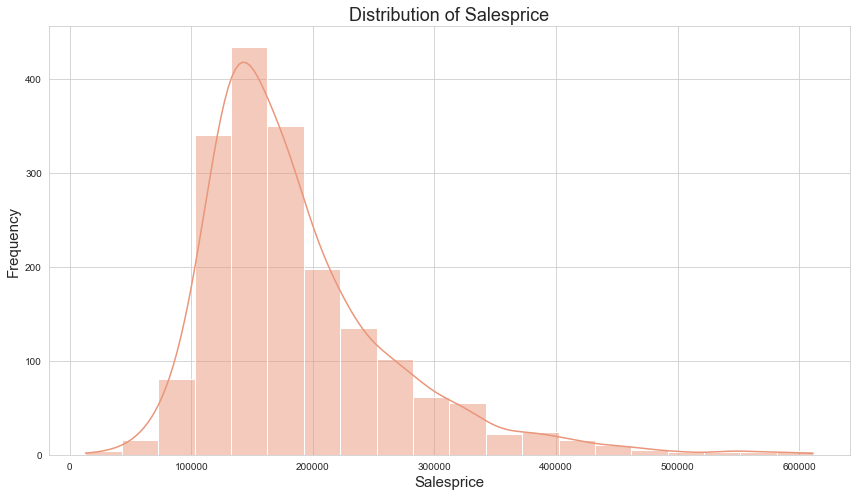

In [20]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Salesprice',fontdict={'fontsize':18})
plt.xlabel('Salesprice', fontdict={'fontsize':15})
plt.ylabel('Frequency', fontdict={'fontsize':15})
sns.histplot(data=train_df, x=train_df['saleprice'],kde=True, bins=20, color='darksalmon');
plt.tight_layout()
plt.savefig('../images/salesprice_distr.png')

Looks like most values in the data set are between 120,000 to a little under 280,000.  This is also a right-skewed distribution as the long tail extends to the right as most values are show on the left side(between 90,000 & 340,000). You can also see a value of 600,000 as an outlier as well. 

## EDA:Correlation & Heatmap

In [21]:
train_df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.793771
gr_liv_area,0.707227
garage_cars,0.653573
garage_area,0.646123
1st_flr_sf,0.625741
total_bsmt_sf,0.624425
full_bath,0.551247
totrms_abvgrd,0.536018
fireplaces,0.444647


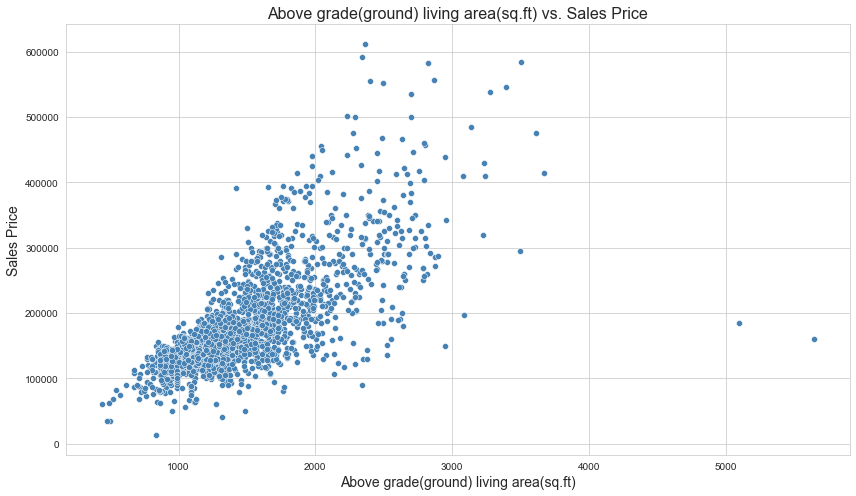

In [22]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train_df,x=train_df['gr_liv_area'], y=train_df['saleprice'],color='steelblue');
plt.tight_layout()
plt.savefig('../images/gr_liv_area_vs_sales.png')

This is a slighly higher than moderate linear relationship, it takes on the shape of a fan. Its correlation is .71.

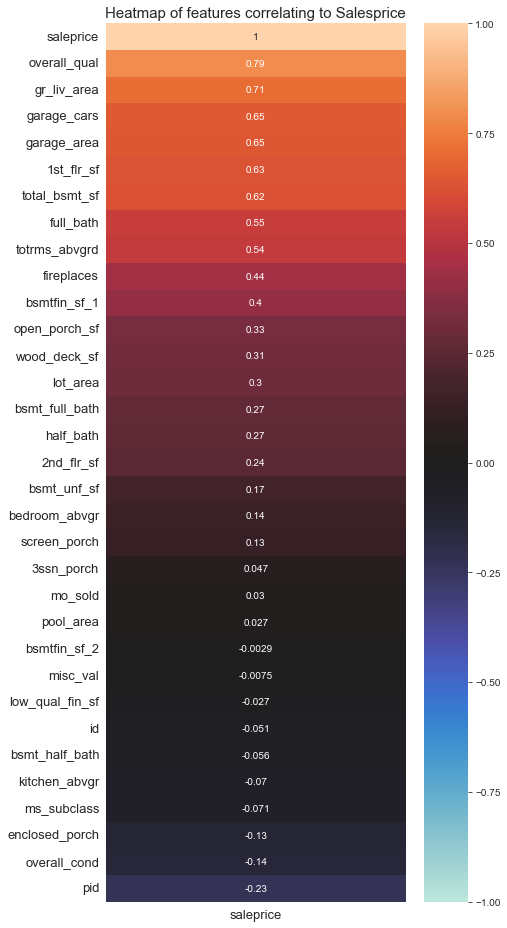

In [23]:
plt.figure(figsize=(7,13))
plt.title('Heatmap of features correlating to Salesprice', fontsize = 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize =13)
sns.heatmap(train_df.corr()[['saleprice']].sort_values(by='saleprice',
                                                       ascending=False),
            cmap='icefire', 
            annot=True, vmin=-1, vmax=1);
plt.tight_layout()
#2.02 eda lesson

This heatmap gives us a good look at the features with the highest correlation.
Such as overall_qual:.81, gr_liv_area at .71.  Some of the features with no effect whatsoever are 3ssn_porch at .037 and the mo_sold at .026.

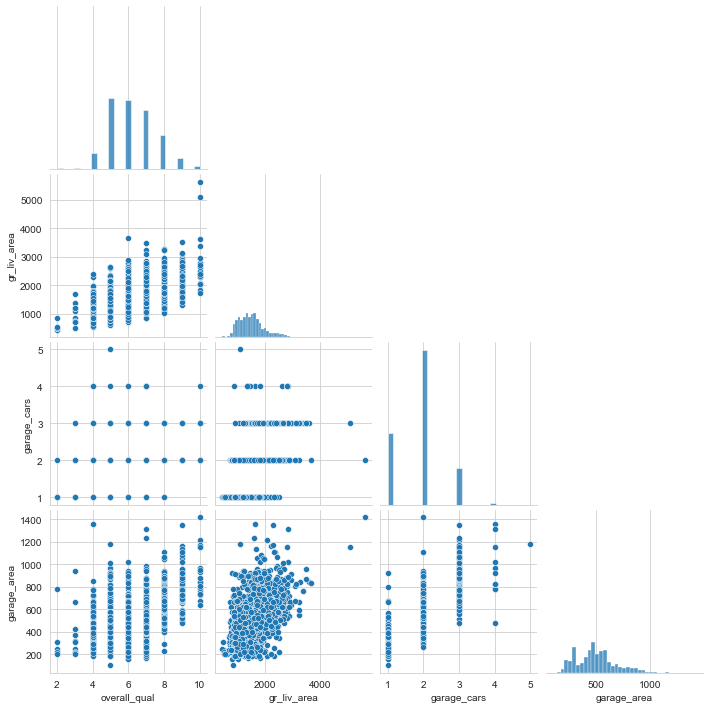

In [24]:
#pairplot of features with highest correlation.
sns.pairplot(train_df[['overall_qual','gr_liv_area','garage_cars','garage_area']], corner=True);

A broader look at some of the top features, categorical values will be harder to gauge visually correlation wise.  Thankfully we have the heatmap for that.

## Feature Engineering

In [25]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010-01-01,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009-01-01,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010-01-01,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010-01-01,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010-01-01,WD,138500


In [26]:
train_df['paved_drive'].value_counts()

Y    1744
N      88
P      34
Name: paved_drive, dtype: int64

In [27]:
#turn them into paved drive and central air as binary categories
#per article central air is one of the most important to home buyers.

train_df['paved_drive']=train_df['paved_drive'].apply(lambda x:1 if x=='Y' else 0)
train_df['central_air']=train_df['central_air'].apply(lambda x:1 if x=='Y' else 0)

#3.06 lesson model walkthrough

In [28]:
train_df['paved_drive'].value_counts(),train_df['central_air'].value_counts()

(1    1744
 0     122
 Name: paved_drive, dtype: int64,
 1    1783
 0      83
 Name: central_air, dtype: int64)

In [29]:
#get dummies to see if zoning type and house style type helps the model.
train_df=pd.get_dummies(columns=['ms_zoning','house_style'], data=train_df, drop_first=True)
#via lab 3.01 linear regression

In [30]:
train_df['overall_qual'].value_counts()

5     499
6     483
7     416
8     239
4     115
9      77
10     22
3      10
2       5
Name: overall_qual, dtype: int64

In [31]:
#built column where we see if its at least an 7 in quality if not 0
train_df['high_qual']=(train_df['overall_qual'] >= 7).astype(int)

In [32]:
train_df['high_qual'].value_counts()

0    1112
1     754
Name: high_qual, dtype: int64

In [33]:
train_df[['gr_liv_area']].median(), train_df[['gr_liv_area']].mean()

(gr_liv_area    1457.0
 dtype: float64,
 gr_liv_area    1515.866559
 dtype: float64)

In [34]:
train_df['best_gr_liv_area']=(train_df['gr_liv_area'] >= 1502).astype(int)

In [35]:
train_df

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,...,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,...,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,...,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0,1,1
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,...,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,...,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,...,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,8,5,2007-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,1,SBrkr,1728,...,0.0,2,0,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,520.0,TA,TA,1,0,276,0,0,0,0,0,1,2008-01-01,WD,298751,0,0,1,0,0,1,0,0,0,0,0,1,1
2047,785,905377130,30,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,4,5,1940-01-01,1950-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,1,SBrkr,861,...,0.0,1,0,1,1,TA,4,Typ,0,Detchd,Unf,2.0,539.0,TA,TA,1,158,0,0,0,0,0,0,3,2009-01-01,WD,82500,0,0,1,0,0,1,0,0,0,0,0,0,0
2048,916,909253010,50,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,6,6,1928-01-01,1950-01-01,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,1,SBrkr,1172,...,0.0,1,1,3,1,TA,9,Typ,1,Detchd,Unf,2.0,342.0,Fa,Fa,1,0,0,0,0,0,0,0,3,2009-01-01,WD,177000,0,0,1,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,104

In [36]:
train_df['best_gr_liv_area'].value_counts()

0    1015
1     851
Name: best_gr_liv_area, dtype: int64

In [37]:
train_df.to_csv('../datasets/train_eda_engineered_1.csv', index=False)

## Model 1

### Model prep

In [38]:
train_df._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'central_air', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_cars', 'garage_area', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'saleprice',
       'ms_zoning_FV', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM',
       'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin',
       'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer',
       'house_style_SLvl', 'high_qual', 'best_gr_liv_area'],
      dtype='object')

In [39]:
features=[col for col in train_df._get_numeric_data().columns if col != 'saleprice']
#Lesson Model workflow

X=train_df[features]
y=train_df['saleprice']
X.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
0,109,533352170,60,13517,6,8,533.0,0.0,192.0,725.0,1,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,1,0,44,0,0,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,11492,7,5,637.0,0.0,276.0,913.0,1,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,1,0,74,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,0,0,1,1
2,153,535304180,20,7922,5,7,731.0,0.0,326.0,1057.0,1,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,1,0,52,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,318,916386060,60,9802,5,5,0.0,0.0,384.0,384.0,1,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,1,100,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,6,8,0.0,0.0,676.0,676.0,1,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,0,59,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
#Summary statistics of features we will use for this model. 
X.describe()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
count,1866.000000,1.866000e+03,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,1466.142015,7.065948e+08,55.948553,10135.571275,6.232583,5.589496,466.972133,51.656484,577.763666,1096.392283,0.955520,1176.304394,335.457128,4.105038,1515.866559,0.446409,0.065916,1.581994,0.384244,2.837621,1.024116,6.447481,0.628081,1.879957,501.367631,0.934620,99.079850,48.517685,21.470525,2.754019,17.705788,2.334941,53.766881,6.206324,0.049839,0.005895,0.792069,0.146302,0.004823,0.511790,0.002144,0.006967,0.297964,0.022508,0.049839,0.404073,0.456056
std,843.905860,1.883892e+08,41.620789,6835.394346,1.359123,1.063545,463.389810,171.261180,440.123340,418.395839,0.206215,394.063839,428.324724,45.505204,495.186332,0.519404,0.252486,0.544017,0.500668,0.786549,0.156905,1.517609,0.641667,0.652120,188.980879,0.247262,131.009013,65.656903,59.346616,26.131633,59.131060,37.433191,595.262334,2.735485,0.217671,0.076573,0.405936,0.353504,0.069300,0.499995,0.046262,0.083198,0.457486,0.148369,0.217671,0.490843,0.498199
min,1.000000,5.263011e+08,20.000000,1300.000000,2.000000,1.000000,0.000000,0.000000,0.000000,160.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,737.500000,5.284310e+08,20.000000,7564.250000,5.000000,5.000000,0.000000,0.000000,238.000000,819.000000,1.000000,889.000000,0.000000,0.000000,1151.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,364.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1471.000000,5.354021e+08,50.000000,9552.000000,6.000000,5.000000,405.500000,0.000000,480.000000,1028.500000,1.000000,1105.000000,0.000000,0.000000,1457.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,484.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2185.250000,9.071260e+08,70.000000,11645.000000,7.000000,6.000000,757.500000,0.000000,811.000000,1341.750000,1.000000,1421.500000,702.000000,0.000000,1735.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,585.750000,1.000000,170.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,5644.000000,147

### Train/test split

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=.7, random_state=42)

In [42]:
linreg=LinearRegression()

### Cross Validation

In [43]:
# Train cross-val  #Test cross-val
cross_val_score(linreg,X_train,y_train).mean(),cross_val_score(linreg,X_test,y_test).mean()

(0.8027070372689241, 0.6558632258573859)

This allows us to establish what the baseline score($R^2$) is for the model based on just the mean, the scores of 80.27% and 65.59%. These numbers signify that the variance in our y(sale price) is explained by the X features in our model.  There is a drop in the test set as it does not do as good of a job generalizing to new data. 

### Model fitting & Evaluation

In [44]:
#Use train data to fit
linreg.fit(X_train,y_train)

LinearRegression()

In [45]:
#training score, #testing score
linreg.score(X_train,y_train), linreg.score(X_test,y_test)

(0.8528460395443072, 0.715310651948985)

### Interpret coefficients

In [46]:
linreg.coef_

array([-5.05135526e-02, -1.05732173e-06, -8.79474882e+01,  6.60698678e-01,
        2.14708674e+04,  3.32194355e+03,  2.67964120e+01,  2.58691649e+00,
        5.37373417e+00,  3.47570813e+01,  4.16582736e+03,  7.57682855e+00,
        3.20229201e+01, -1.58870283e+01,  2.37127167e+01,  4.67363501e+03,
       -3.11274102e+03,  2.28427438e+03,  4.52517941e+03, -1.01003140e+04,
       -3.03776393e+04,  5.68308618e+03,  2.12919451e+03,  4.37677934e+03,
        3.76891876e+01,  1.11177264e+03,  1.06964738e+01,  2.22923789e-01,
       -1.04929380e+01,  5.32601088e+01,  4.65856322e+01,  1.36498929e+01,
       -2.27105492e+01,  5.67323317e+00,  1.26609608e+04,  3.84933601e+03,
        3.63275746e+03, -2.69046022e+03,  1.55891831e+04,  9.13621155e+03,
       -5.65459177e+04, -1.67679198e+04, -1.54404742e+03,  1.71131539e+04,
        1.21568160e+04, -2.75538446e+03,  2.35808624e+03])

In [47]:
set(zip(X.columns, linreg.coef_))

{('1st_flr_sf', 7.576828552474905),
 ('2nd_flr_sf', 32.022920145041006),
 ('3ssn_porch', 53.26010884817224),
 ('bedroom_abvgr', -10100.31396441665),
 ('best_gr_liv_area', 2358.086241699621),
 ('bsmt_full_bath', 4673.635005237635),
 ('bsmt_half_bath', -3112.7410204755656),
 ('bsmt_unf_sf', 5.373734171159618),
 ('bsmtfin_sf_1', 26.796411964118622),
 ('bsmtfin_sf_2', 2.586916486748869),
 ('central_air', 4165.827360067593),
 ('enclosed_porch', -10.492937993576376),
 ('fireplaces', 2129.1945086722776),
 ('full_bath', 2284.2743802534997),
 ('garage_area', 37.68918755521757),
 ('garage_cars', 4376.779344361312),
 ('gr_liv_area', 23.712716677556347),
 ('half_bath', 4525.179406937955),
 ('high_qual', -2755.384461197524),
 ('house_style_1.5Unf', 15589.183149973125),
 ('house_style_1Story', 9136.211549147647),
 ('house_style_2.5Fin', -56545.91766413306),
 ('house_style_2.5Unf', -16767.919753546903),
 ('house_style_2Story', -1544.0474153351786),
 ('house_style_SFoyer', 17113.153880050075),
 ('hous

In [48]:
pd.DataFrame(list(zip(X, linreg.coef_)), 
             columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
4,overall_qual,21470.867416
43,house_style_SFoyer,17113.153880
38,house_style_1.5Unf,15589.183150
34,ms_zoning_FV,12660.960779
44,house_style_SLvl,12156.816008
39,house_style_1Story,9136.211549
21,totrms_abvgrd,5683.086180
15,bsmt_full_bath,4673.635005
18,half_bath,4525.179407
23,garage_cars,4376.779344


The way to interpret these coefficients, with using high quality as an example is as follows:

Holding all else constant, for every home that is high quality, we expect an increase of 33,305.36 dollars.

### Prediction Time!

In [49]:
train_preds=linreg.predict(X_train)
test_preds=linreg.predict(X_test)
X_train.shape

(1306, 47)

### LINE(assumptions)


In [50]:
residuals=y_test-test_preds
residuals.mean()

957.9749886982621

L assumption: relationship between x and y should be linear

I assumption is true by assumption

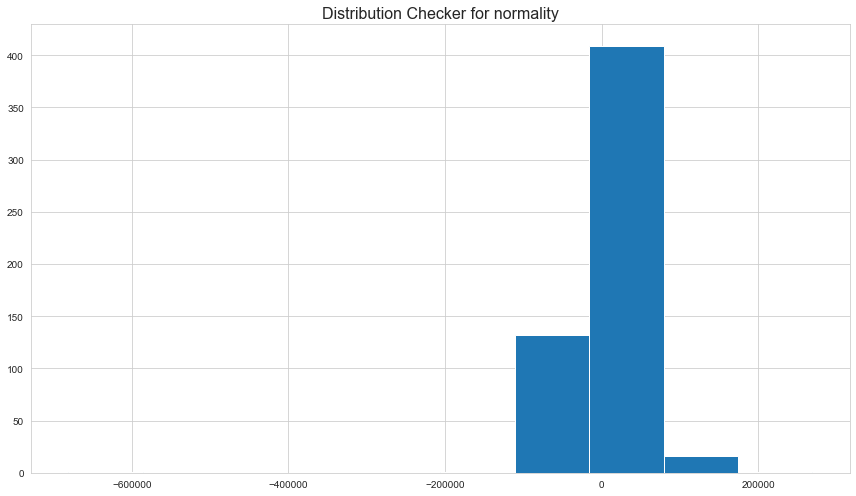

In [51]:
plt.figure(figsize=(12,7))
plt.title('Distribution Checker for normality', fontsize =16)
plt.hist(residuals, bins=10);
plt.tight_layout()
#violates normality assumption

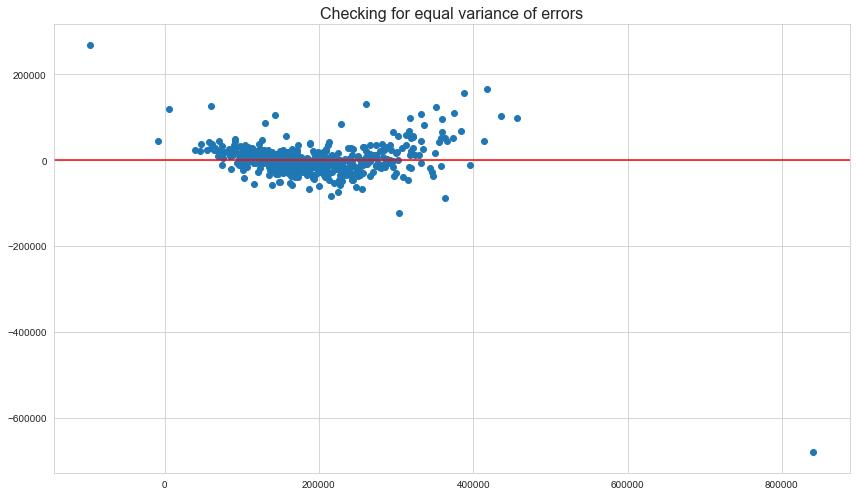

In [52]:
plt.figure(figsize = (12,7))
plt.title('Checking for equal variance of errors', fontsize = 16)
plt.scatter(test_preds,residuals)
plt.axhline(0,color = 'red');
plt.tight_layout()

Does not pass equal variance of errors assumption, also  note of the outlier in the lower right hand corner. Can be addressed in a future model with applying log.

### Multicollinearity/Independence of Predictors

In [53]:
X.corr()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
id,1.000000,0.180369,0.014740,0.031207,-0.060564,-0.025733,-0.047103,0.001512,0.017181,-0.033476,-0.041608,-0.022231,0.001898,-0.010776,-0.017040,-0.026972,0.005487,-0.058544,-0.040966,0.022496,0.009138,0.000879,-0.035734,-0.039759,-0.034274,-0.050282,0.002437,-0.000148,0.025179,-0.026459,0.012158,0.054716,-0.008072,0.130553,-0.059743,0.012774,-0.008147,0.044449,0.014484,-0.025732,0.007477,0.040744,-0.026152,0.038349,0.006120,-0.033152,-0.024556
pid,0.180369,1.000000,-0.035444,0.025691,-0.241517,0.124003,-0.069141,-0.006162,-0.096389,-0.180493,-0.196855,-0.140376,-0.007143,0.049724,-0.113319,-0.021700,-0.003780,-0.186165,-0.147725,-0.008552,0.043201,-0.099938,-0.101611,-0.182802,-0.150536,-0.207010,-0.021828,-0.078722,0.133573,-0.026086,-0.037812,-0.000151,0.004381,-0.032464,-0.213532,-0.002256,-0.224228,0.371342,0.027581,-0.112468,0.049013,0.088180,-0.101359,0.107388,0.020058,-0.159727,-0.083826
ms_subclass,0.014740,-0.035444,1.000000,-0.244072,0.067378,-0.106152,-0.057654,-0.070551,-0.144470,-0.244705,-0.035064,-0.248791,0.301522,0.011095,0.063845,0.025792,-0.014117,0.127755,0.208163,-0.059498,0.184107,-0.004941,-0.023023,0.016742,-0.060021,0.038854,0.008532,-0.008441,-0.055152,-0.029560,-0.030138,0.003501,-0.037008,0.012785,0.191568,0.078160,-0.322977,0.242386,0.008637,-0.446288,0.019829,0.039124,0.345456,0.152400,0.158425,0.050125,0.027482
lot_area,0.031207,0.025691,-0.244072,1.000000,0.113728,-0.013980,0.225383,0.040836,0.051788,0.320813,0.038780,0.360159,0.032712,0.004625,0.315331,0.119933,0.033837,0.117208,0.046317,0.143110,-0.001119,0.234956,0.283117,0.202084,0.259520,-0.014496,0.151919,0.127587,0.011353,0.020850,0.066399,0.086016,0.098600,0.004284,-0.123662,-0.038023,0.265411,-0.215689,-0.033448,0.054254,0.047788,0.003185,-0.038174,-0.027608,0.006944,0.072444,0.230776
overall_qual,-0.060564,-0.241517,0.067378,0.113728,1.000000,-0.162414,0.240419,-0.055737,0.257223,0.514039,0.191895,0.497287,0.217071,-0.036565,0.580137,0.151347,-0.071263,0.547817,0.257855,0.033341,-0.101746,0.413279,0.359927,0.585067,0.546118,0.244714,0.243357,0.311746,-0.151767,0.029179,0.033758,0.020505,0.024075,0.012180,0.181913,-0.038942,0.109084,-0.201435,-0.023302,-0.045067,0.043233,0.028339,0.238599,-0.092450,-0.042828,0.833994,0.479936
overall_cond,-0.025733,0.124003,-0.106152,-0.013980,-0.162414,1.000000,-0.067799,0.043859,-0.152562,-0.217621,0.056055,-0.159483,-0.012863,0.020402,-0.136166,-0.057317,0.108808,-0.242982,-0.119496,-0.007937,-0.072383,-0.104721,-0.024270,-0.248130,-0.205747,-0.069491,-0.005368,-0.085881,0.123743,0.022063,0.041451,-0.004046,0.017105,0.012725,-0.124662,-0.036110,-0.051262,0.139861,0.085078,-0.060468,0.061486,0.086875,-0.071366,0.024605,0.030519,-0.202836,-0.145379
bsmtfin_sf_1,-0.047103,-0.069141,-0.057654,0.225383,0.240419,-0.067799,1.000000,-0.069196,-0.522595,0.529482,0.128848,0.480386,-0.182815,-0.069444,0.217774,0.631200,0.065876,0.068330,-0.028494,-0.130035,-0.027793,0.071530,0.280788,0.234752,0.320624,0.181224,0.197645,0.139998,-0.072766,0.048223,0.090132,0.088165,0.136439,-0.007291,-0.038431,0.018924,0.163655,-0.159376,-0.051857,0.212056,-0.033638,-0.060174,-0.145374,0.113818,-0.002421,0.136901,0.135188
bsmtfin_sf_2,0.001512,-0.006162,-0.070551,0.040836,-0.055737,0.043859,-0.069196,1.000000,-0.255824,0.063582,0.029795,0.092649,-0.095680,-0.008656,-0.009827,0.152407,0.097629,-0.084495,-0.020834,-0.042512,-0.01

Violates this as the garage cars and garage area features  have a high correlation of .854 but will still go forward for the predictive models.

### Checking for residuals!

In [54]:
#Training and testing MSE/RMSE
mse_train = metrics.mean_squared_error(y_train, train_preds)
mse_test =metrics.mean_squared_error(y_test, test_preds)
rmse_train = metrics.mean_squared_error(y_train, train_preds, squared=False)
rmse_test = metrics.mean_squared_error(y_test, test_preds, squared = False)
r2_train = metrics.r2_score(y_train,train_preds)
r2_test = metrics.r2_score(y_test,test_preds)
print (f'The training MSE is {mse_train}, while the testing MSE is {mse_test}')
print(f'The training RMSE is {rmse_train}, while the testing RMSE is {rmse_test}')
print(f'R2 train score: {r2_train}, while R2 test score: {r2_test}')

The training MSE is 875423026.7094098, while the testing MSE is 1913177157.050377
The training RMSE is 29587.548507935055, while the testing RMSE is 43739.880624555626
R2 train score: 0.8528460395443072, while R2 test score: 0.715310651948985


Training MSE is lower than testing MSE which is indicative of a a model not generalizing very well to "new" data.

This model is slightly overfit as it does not generalize well to new data compared to how it does on the data it is trained on, as exhibited by the drop in score($R^2$) from .85 to .71. In other words this model can explain 85.28% of the variation in sales price for homes in Ames, Iowa but can only predict 71.53% of the variation in sales price when encountering new data.

In [55]:
print(1-(1-metrics.r2_score(y_test, test_preds)*(len(y_test-1)/(len(y_test)-len(features)-1))))
#3.02-lesson regression metrics(adjusted R2)

0.7823710255692023


The more variables are added,$R^2$ does not decrease. Here we calculate adjusted $R^2$ in order to account for the number of predictors in the model.  The fact that the score increases indicates that the variables are more useful in nature.

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/

Ultimately this first iteration of the model is not bad in terms of score but there is a need to seek more balance between bias and variance. This can be tackled with regularization which helps add a penalty to the loss function and avoids overfitting.

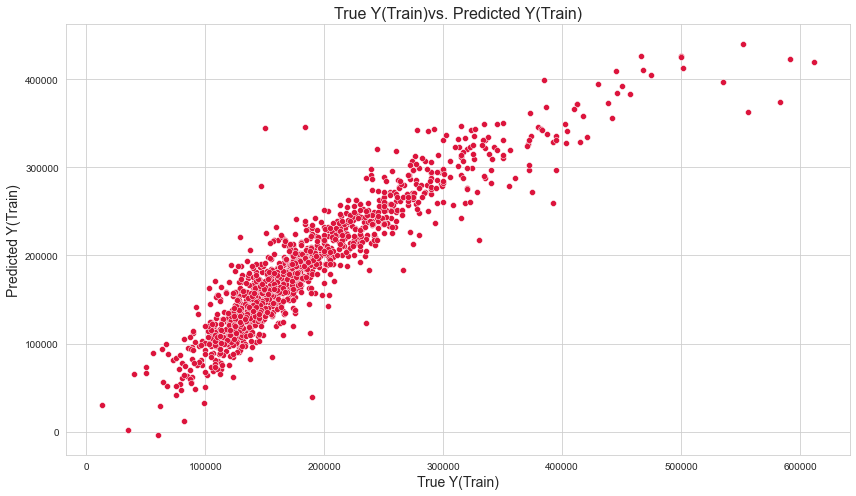

In [56]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_train, y=train_preds, color='crimson');
plt.tight_layout()
plt.savefig('../images/1st_model_train.png')

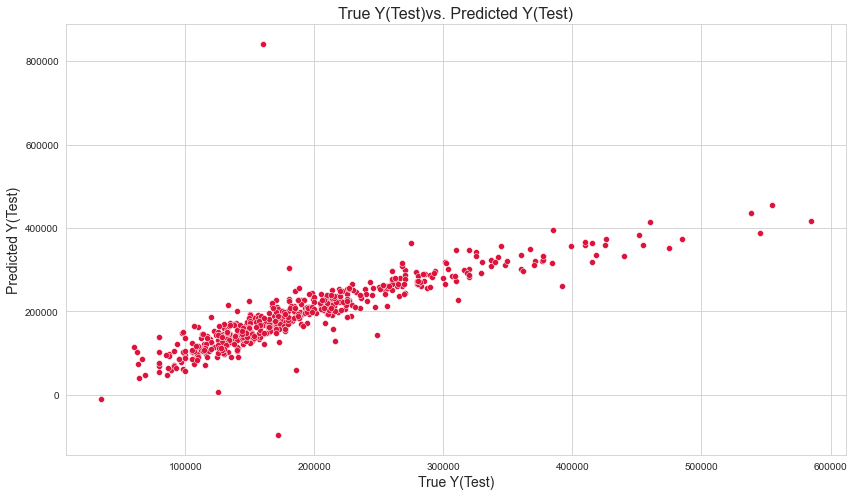

In [57]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_test, y=test_preds, color='crimson');
plt.tight_layout()
plt.savefig('../images/1st_model_test.png')

A quick side to side visualization of the actual train and test versus the predicted.  We can see how the test version is slightly worse by the visual of more outliers.

## Model 2

### Regularization

In [58]:
sc=StandardScaler()
Z_train=sc.fit_transform(X_train)
Z_test=sc.transform(X_test)

In [59]:
linreg2=LinearRegression()
linreg2.fit(Z_train,y_train)


LinearRegression()

In [60]:
r_alphas=np.logspace(0,5,100)

ridge_cv=RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_cv.fit(Z_train,y_train)

ridge_cv.alpha_

148.4968262254465

In [61]:
ridge_2=Ridge(alpha=ridge_cv.alpha_)
ridge_2.fit(Z_train, y_train)
print(f'Train score: {ridge_2.score(Z_train,y_train)}')
print(f'Test score: {ridge_2.score(Z_test, y_test)}')

Train score: 0.8477172779710076
Test score: 0.7329601681058306


Using Ridge we see a minimal difference between the original and the ridge version. Just that the training and test scores are a bit closer together. Original scores were 85.28%(training) and 71.53%(testing) compared to ridge scores of 84.77%(training) and 73.29%(testing).  We can see Ridge had a slightly worse performance with testing and slightly better with training, which also lowered the variance and made it slightly less overfit.  

This indicates a need for features that are more signal than noise, in order to strengthen the model's overall performance, increasing feature engineering that is guided by the research can help with this.

In [62]:
ridge_2_train_preds=ridge_2.predict(Z_train)
ridge_2_test_preds=ridge_2.predict(Z_test)

rmse_ridge2_train=metrics.mean_squared_error(y_train, ridge_2_train_preds, squared = False)
rmse_ridge2_test =metrics.mean_squared_error(y_test, ridge_2_test_preds, squared = False)
print(f'Training RMSE: {rmse_ridge2_train} and testing RMSE: {rmse_ridge2_test}')

Training RMSE: 30098.740384982866 and testing RMSE: 42362.346429222154


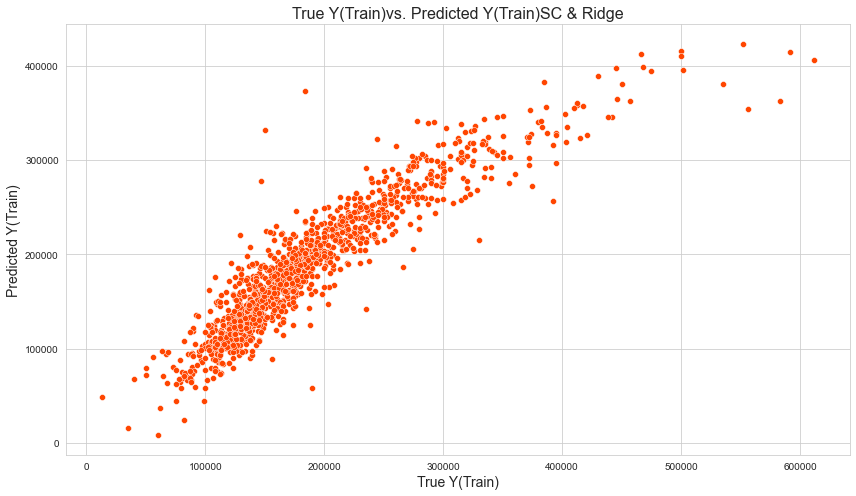

In [63]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)SC & Ridge',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= ridge_2,x=y_train, y=ridge_2_train_preds, color='orangered');
plt.tight_layout()
plt.savefig('../images/2nd_model_train.png')

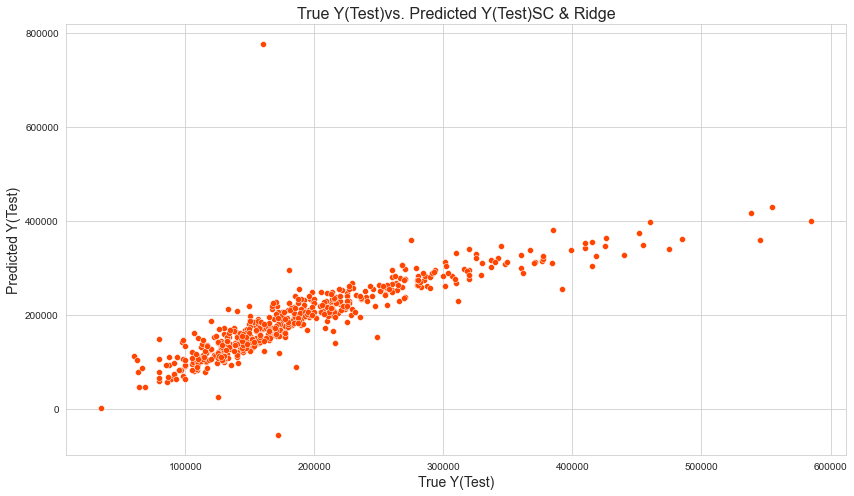

In [64]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)SC & Ridge',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= ridge_2,x=y_test, y=ridge_2_test_preds, color='orangered');
plt.tight_layout()
plt.savefig('../images/2nd_model_test.png')